In [27]:
import tensorflow as tf
import numpy as np
import cv2 
from tensorflow import keras
import matplotlib.pyplot as plt
import PIL

from tensorflow.keras.preprocessing import image

In [10]:
from keras.models import load_model

In [12]:
model = load_model("recognition")


In [13]:
img = cv2.imread("./image/7.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(9,9),0)

img = cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
(thresh, blackAndWhiteImage) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img = img.astype("float32") / 255


In [14]:

pred = model.predict(img.reshape(1,28, 28,1))
print(pred.argmax())


1/1 [==============================] - 1s 660ms/step
5


/tmp/ipykernel_9717/3857468347.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = PIL.Image.open('./image/1.png').convert('L').resize((28, 28), PIL.Image.ANTIALIAS)


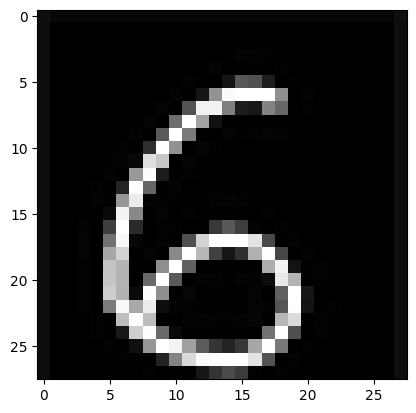

1/1 [==============================] - 0s 56ms/step
Prediction value: 9


In [33]:
def normalize_image (img) :
    """
    Normalize image
    :param img: input image with range 0-255 int
    :return: normalized image (with range 0 - 1 float)
    """

    # taken from https://stackoverflow.com/questions/46689428/convert-np-array-of-type-float64-to-type-uint8-scaling-values
    info = np.iinfo(img.dtype)
    norm_img = img.astype(np.float64) / info.max

    # tensorflow mnist use black background - so change bg from white to black
    for i in range(len(norm_img)):
        for j in range(len(norm_img[i])):
            norm_img[i][j] = abs(norm_img[i][j] - 1)

    return norm_img



img = PIL.Image.open('./image/1.png').convert('L').resize((28, 28), PIL.Image.ANTIALIAS)
img = np.array(img)
img = normalize_image(img)

# create my custom tests list
my_tests = np.array([img])
                                                    
# show the image which value I want to predict
plt.imshow(img, cmap="gray")
plt.show()
predictions = model.predict(my_tests)
print("Prediction value:", np.argmax(predictions[0]))